
# Project: Investigate a Dataset - [Soccer Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data analysis is for european soccer database from 2008 to 2016. The database is collected from kaggle. The dataset records useful information for 11 european leagues, teams, matches and players from different countries. The dataset contains 7 tables which are:
>
> * Countries
> * Leagues
> * Matches
> * Players
> * Players attributes
> * Teams
> * Teams attributes



### Questions for Analysis

> 1. Which home/away teams had the most wins in all leagues from 2008 to 2016?
> 2. Which team won the league in 2008/2009 season in England Premier league?
> 3. Which players had the highest interceptions?
> 4. Which players had the highest ratings?
> 5. Which is the most preferred foot ?

In [1]:
# Importing the pakages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties
> In this section, I will load the csv files to get the tables and converting them into dataframes to deal with them. Then, I will explore the data to decide which data I'm going to clean them to use them in answering my questions.

In [2]:
# Loading all the tables to read them
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')
df_match = pd.read_csv('Match.csv')
df_player = pd.read_csv('Player.csv')
df_player_attributes = pd.read_csv('Player_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_team_attributes = pd.read_csv('Team_Attributes.csv')

In [3]:
# sqlite_sequence table
pd.read_csv('sqlite_sequence.csv')

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


#### Exploing some information of dataframes

In [4]:
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
df_country.info()
print(df_country.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
(11, 2)


Country table has 11 rows and 2 columns

In [6]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
df_league.info()
print(df_league.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 344.0+ bytes
(11, 3)


League table has 11 rows and 3 columns

In [8]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
df_match.shape

(25979, 115)

Match table has 25979 rows and 115 columns

In [10]:
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

There is alot of missing values in matches columns after the first 10 columns. So, I will drop those columns in Data Cleaning Process.

In [11]:
df_match.duplicated().sum()

0

In [12]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [13]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [14]:
df_player.shape

(11060, 7)

Player table has 11060 rows and 7 columns

In [15]:
df_player.nunique()

id                    11060
player_api_id         11060
player_name           10848
player_fifa_api_id    11060
birthday               5762
height                   20
weight                   50
dtype: int64

It appears that there are players with same names but different id which means that they are different

In [16]:
df_player.duplicated().sum()

0

In [17]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [18]:
df_player_attributes.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


> You can see here that there is no player name, so it has to be merged with player table based on player id.

In [19]:
df_player_attributes.shape

(183978, 42)

Player attributes table has 183978 rows and 42 columns

In [20]:
df_player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [21]:
df_player_attributes.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [22]:
df_player_attributes.duplicated().sum()

0

In [23]:
df_player_attributes.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [24]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [25]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [26]:
df_team.shape

(299, 5)

In [27]:
df_team.describe()

,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


Team table has 299 rows and 5 columns

In [28]:
df_team.team_long_name.duplicated().sum()

3

In [29]:
df_team_attributes.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [30]:
df_team_attributes.shape

(1458, 25)

Team attributes table has 1458 rows and 25 columns

In [31]:
df_team_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

The data seems ready to use except for the buildUpPlayDribbling column as it has alot of missing values, but we can fix it using the buildUpPlayDribblingClass to set a range and fill those missing data.

In [32]:
df_team_attributes.duplicated().sum()

0

In [33]:
df_team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

There is alot of missing values in buildUpPlayDribbling column data

In [34]:
df_team_attributes.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000





## Data Cleaning


#### I will drop the unused columns and merge match table with league table and team table.

In [35]:
# Droping the unuseful columns in match table
# Dropping the columns with missed data
df_match.dropna(axis= 1, inplace= True)
df_match.drop(['stage', 'match_api_id'], axis= 1, inplace= True)
df_match.head()

,id,country_id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,7947,9985,1,3


In [36]:
# Checking information of the modified match table
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
id                  25979 non-null int64
country_id          25979 non-null int64
league_id           25979 non-null int64
season              25979 non-null object
date                25979 non-null object
home_team_api_id    25979 non-null int64
away_team_api_id    25979 non-null int64
home_team_goal      25979 non-null int64
away_team_goal      25979 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.8+ MB


In [37]:
# Converting date column to datetime
df_match['date'] = pd.to_datetime(df_match['date'])

> I will apply inner merge between match table and country table to know the name of countries in corresponding matches. Then, I will  drop country id because I don't need it anymore.

In [38]:
# Copying country dataframe
df_country_c = df_country.copy()

# Rename name to country_name and id to country_id to differentiate between them and those in match table
df_country_c.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

In [39]:
# Applying inner merge with country table
df_match = df_match.merge(df_country_c, left_on= 'country_id', right_on= 'country_id', how= 'inner')

# Dropping the id because I don't need it
df_match.drop(columns=['country_id'], inplace= True)

In [40]:
df_match.head()

,id,league_id,season,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,country_name
0,1,1,2008/2009,2008-08-17,9987,9993,1,1,Belgium
1,2,1,2008/2009,2008-08-16,10000,9994,0,0,Belgium
2,3,1,2008/2009,2008-08-16,9984,8635,0,3,Belgium
3,4,1,2008/2009,2008-08-17,9991,9998,5,0,Belgium
4,5,1,2008/2009,2008-08-16,7947,9985,1,3,Belgium


> I will apply the previous step again for the team table

In [41]:
# Copying team dataframe
df_team_c = df_team.copy()
# I only need team_long_name and team_api_id so I will drop the other columns
df_team_c.drop(columns= ['team_short_name', 'id', 'team_fifa_api_id'], axis= 1, inplace= True)

In [42]:
# Merging left for away_team_id
df_match = df_match.merge(df_team_c, left_on= 'away_team_api_id', right_on= 'team_api_id', how= 'left')
# Renaming the column
df_match.rename(columns={'team_long_name' : 'away_team_name'}, inplace= True)
# Dropping the unneeded columns
df_match.drop(columns=['team_api_id', 'away_team_api_id'], axis= 1, inplace= True)

In [43]:
# Inner Merging for home_team_id
df_match = df_match.merge(df_team_c, left_on= 'home_team_api_id', right_on= 'team_api_id', how= 'inner')
# Renaming the column
df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace= True)
# Dropping the unneeded columns
df_match.drop(columns=['team_api_id', 'home_team_api_id'], axis= 1, inplace= True)

In [44]:
df_match.head()

,id,league_id,season,date,home_team_goal,away_team_goal,country_name,away_team_name,home_team_name
0,1,1,2008/2009,2008-08-17,1,1,Belgium,Beerschot AC,KRC Genk
1,29,1,2008/2009,2008-11-15,1,1,Belgium,KSV Roeselare,KRC Genk
2,47,1,2008/2009,2008-11-29,3,2,Belgium,KSV Cercle Brugge,KRC Genk
3,65,1,2008/2009,2008-12-13,1,0,Belgium,Sporting Charleroi,KRC Genk
4,94,1,2008/2009,2009-01-24,2,0,Belgium,RAEC Mons,KRC Genk


> I will apply the previous step again for the league table

In [45]:
# Copying league dataframe
df_league_c = df_league.copy()
# Renaming id to league_id and name to league_name
df_league_c.rename(columns={'id': 'league_id', 'name': 'league_name'}, inplace= True)

In [46]:
# Applying inner merge between match table and league table
df_match = df_match.merge(df_league_c, left_on= 'league_id', right_on= 'league_id', how= 'inner')

# I will drop country_id and league_id because I don't need them again
df_match.drop(columns= ['country_id', 'league_id'], inplace= True)

In [47]:
df_match.head()

,id,season,date,home_team_goal,away_team_goal,country_name,away_team_name,home_team_name,league_name
0,1,2008/2009,2008-08-17,1,1,Belgium,Beerschot AC,KRC Genk,Belgium Jupiler League
1,29,2008/2009,2008-11-15,1,1,Belgium,KSV Roeselare,KRC Genk,Belgium Jupiler League
2,47,2008/2009,2008-11-29,3,2,Belgium,KSV Cercle Brugge,KRC Genk,Belgium Jupiler League
3,65,2008/2009,2008-12-13,1,0,Belgium,Sporting Charleroi,KRC Genk,Belgium Jupiler League
4,94,2008/2009,2009-01-24,2,0,Belgium,RAEC Mons,KRC Genk,Belgium Jupiler League


> So far, I have generated the required dataframe for my analysis. Now, I need to create a column to get the result of these matches by comparing number of goals scored by each team. So, I will create a function to return the result of whom is the winner.

In [48]:
def result(x):
    home_goal = x[0]
    home_team_name = x[1]
    away_goal = x[2]
    away_team_name = x[3]
    
    if home_goal > away_goal:
        return home_team_name
    elif home_goal < away_goal:
        return away_team_name
    else:
        return 'draw'
    
# Adding the result column
df_match['result']  = df_match[['home_team_goal', 'home_team_name', 'away_team_goal', 'away_team_name']].apply(result, axis=1)

In [49]:
df_match.head()

,id,season,date,home_team_goal,away_team_goal,country_name,away_team_name,home_team_name,league_name,result
0,1,2008/2009,2008-08-17,1,1,Belgium,Beerschot AC,KRC Genk,Belgium Jupiler League,draw
1,29,2008/2009,2008-11-15,1,1,Belgium,KSV Roeselare,KRC Genk,Belgium Jupiler League,draw
2,47,2008/2009,2008-11-29,3,2,Belgium,KSV Cercle Brugge,KRC Genk,Belgium Jupiler League,KRC Genk
3,65,2008/2009,2008-12-13,1,0,Belgium,Sporting Charleroi,KRC Genk,Belgium Jupiler League,KRC Genk
4,94,2008/2009,2009-01-24,2,0,Belgium,RAEC Mons,KRC Genk,Belgium Jupiler League,KRC Genk


In [50]:
# Saving cleaned data of match dataframe
df_match.to_csv('match_clean.csv', index= False)

> I need to do the same merging for team with team attributes table but first I have to drop duplicated values

In [51]:
df_team.shape

(299, 5)

In [52]:
df_team.duplicated().sum()

0

In [53]:
df_team.team_long_name.duplicated().sum()

3

In [54]:
# Dropping duplicates from team_long_name column
df_team.drop_duplicates(subset= ['team_long_name'], inplace= True)

In [55]:
df_team.shape

(296, 5)

The duplicated values is removed now. So, the data in team table is ready to be merged with team attributes table.

In [56]:
# Joining team with team attributes tables
df_team_merged = df_team_attributes.merge(df_team, left_on= 'team_api_id', right_on= 'team_api_id', how= 'inner')
df_team_merged.head(2)

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR


In [57]:
# Dropping columns that I don't need again
df_team_merged.drop(columns= ['team_fifa_api_id_x', 'id_y', 'team_fifa_api_id_y'], inplace= True)

In [58]:
# Renaming columns to remove _x and _y from the table
df_team_merged.rename(columns= {'id_x': 'id', 'team_fifa_api_id_x': 'team_fifa_api_id'}, inplace= True)

In [59]:
# Converting date column type to datetime
df_team_merged['date'] = pd.to_datetime(df_team_merged['date'])

In [60]:
df_team_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


In [61]:
# Saving the cleaned data of merged team table
df_team_merged.to_csv('team_clean.csv', index= False)

> I need to do merging for player table with player attributes table but first I have to clean its data from NaN values, duplicates and missing values.

In [62]:
df_player_attributes.isnull().sum().sum()

47301

I will drop these NaN values

In [63]:
df_player_attributes.dropna()
df_player_attributes.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [64]:
# Joining the player table with player attributes table
df_player_attributes = df_player_attributes.merge(df_player, left_on= 'player_api_id', right_on= 'player_api_id', how= 'inner')

In [65]:
df_player_attributes.head(3)

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [66]:
# Renaming id_x to id
df_player_attributes.rename(columns={'id_x': 'id'}, inplace= True)
# Dropping unneeded columns
df_player_attributes.drop(columns= ['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace= True)

In [67]:
df_player_attributes.head(2)

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


The last editing in this dataframe should by converting the datatype of date column and birthday column into datetime

In [68]:
df_player_attributes['birthday'] = pd.to_datetime(df_player_attributes['birthday'])
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

In [69]:
df_player_attributes.head(2)

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187


In [70]:
# Saving the cleaned data of player attributes table
df_player_attributes.to_csv('player_clean.csv', index= False)

<a id='eda'></a>
## Exploratory Data Analysis


There is positive correlation between heading accuracy and overall rating.

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

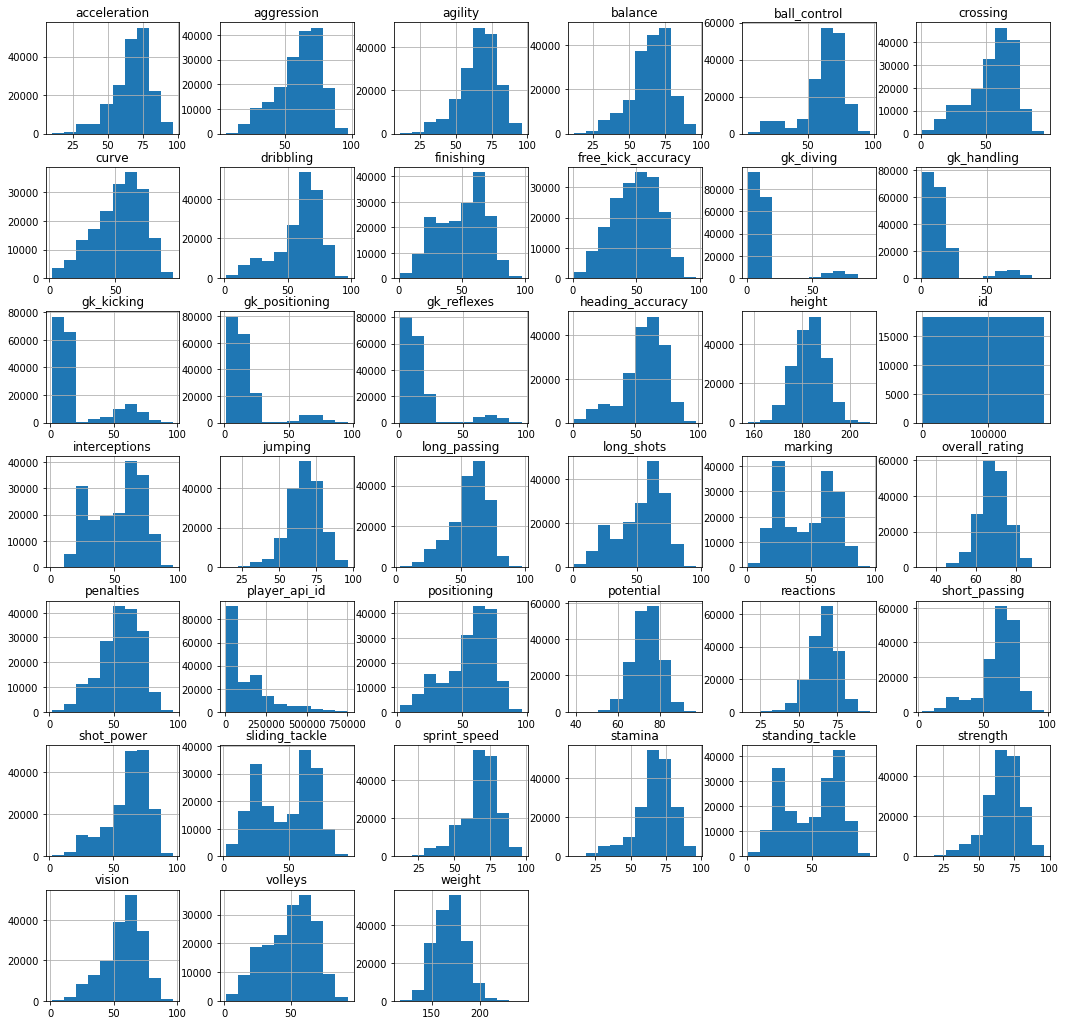

In [71]:
df_player_attributes.hist(figsize=(18,18));

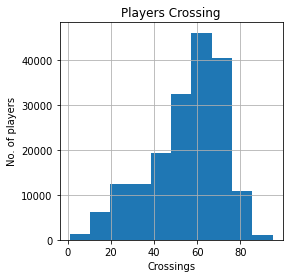

In [72]:
# Exploring from the player attributes dataframe to extract useful information
df_player_attributes.crossing.hist(figsize=(4, 4))
plt.title('Players Crossing')
plt.xlabel('Crossings')
plt.ylabel('No. of players');

The crossing histogram graph is skewed to the left

### Research Question 1 (Which home/away teams had the most wins in all leagues from 2008 to 2016?)

> I will read the cleaned csv files to show cleaned data.

In [73]:
df_team = pd.read_csv('team_clean.csv')
df_match = pd.read_csv('match_clean.csv')
df_player = pd.read_csv('player_clean.csv')

In [74]:
df_match.head()

,id,season,date,home_team_goal,away_team_goal,country_name,away_team_name,home_team_name,league_name,result
0,1,2008/2009,2008-08-17,1,1,Belgium,Beerschot AC,KRC Genk,Belgium Jupiler League,draw
1,29,2008/2009,2008-11-15,1,1,Belgium,KSV Roeselare,KRC Genk,Belgium Jupiler League,draw
2,47,2008/2009,2008-11-29,3,2,Belgium,KSV Cercle Brugge,KRC Genk,Belgium Jupiler League,KRC Genk
3,65,2008/2009,2008-12-13,1,0,Belgium,Sporting Charleroi,KRC Genk,Belgium Jupiler League,KRC Genk
4,94,2008/2009,2009-01-24,2,0,Belgium,RAEC Mons,KRC Genk,Belgium Jupiler League,KRC Genk


Now, I need to query each home and away team names that won their matches

In [75]:
match_home = df_match.query('home_team_name == result')
match_home.groupby(['result']).count()['id'].sort_values(ascending=False)

result
FC Barcelona                    131
Real Madrid CF                  129
Celtic                          120
Manchester United               116
Manchester City                 113
FC Bayern Munich                109
PSV                             105
Juventus                        105
Atlético Madrid                 103
FC Basel                        103
Ajax                            103
FC Porto                        102
SL Benfica                      102
Paris Saint-Germain             102
Chelsea                         101
Arsenal                          97
Roma                             97
Napoli                           95
LOSC Lille                       93
Milan                            92
Sevilla FC                       91
Olympique Lyonnais               91
Inter                            90
Valencia CF                      90
Borussia Dortmund                88
Tottenham Hotspur                88
Feyenoord                        86
Liverpool            

In [76]:
match_away = df_match.query('away_team_name == result')
match_away.groupby(['result']).count()['id'].sort_values(ascending=False)

result
FC Barcelona                    103
Real Madrid CF                   99
Celtic                           98
Juventus                         84
FC Bayern Munich                 84
SL Benfica                       83
FC Porto                         81
Ajax                             78
FC Basel                         77
Manchester United                76
Chelsea                          75
Paris Saint-Germain              73
PSV                              73
Arsenal                          73
Borussia Dortmund                69
Roma                             65
Sporting CP                      65
Liverpool                        64
Inter                            64
Atlético Madrid                  64
Olympique de Marseille           63
Tottenham Hotspur                63
Olympique Lyonnais               62
Milan                            62
Manchester City                  62
Bayer 04 Leverkusen              61
FC Twente                        59
Napoli               

> It appears that Barcelona and Real madrid are the most winning teams in Europe

If the next two cells run an error, that's because they need another version for matplotlib which is matplotlib 3.3.2 because when I run those cells on different version I faced this eeror ---> attributeerror: unknown property ticks

In [77]:
! pip install matplotlib==3.3.2

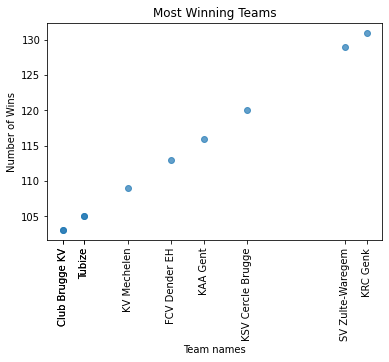

<Figure size 720x720 with 0 Axes>

In [78]:
# Visualizing in scatter plot for some home teams
match = df_match.query('home_team_name == result').groupby(['result']).count()['id'].sort_values(ascending= False)[:10]
match_names = df_match.query('home_team_name == result').result.unique()[:10]
plt.scatter(match, match, alpha= 0.7)
plt.xticks(ticks= match, labels= match_names, rotation= 90)
plt.title('Most Winning Teams')
plt.xlabel('Team names')
plt.ylabel('Number of Wins')
plt.figure(figsize=(10, 10));
plt.tight_layout()
plt.show();

Barcelona and Real Madrid are the most home winning teams.

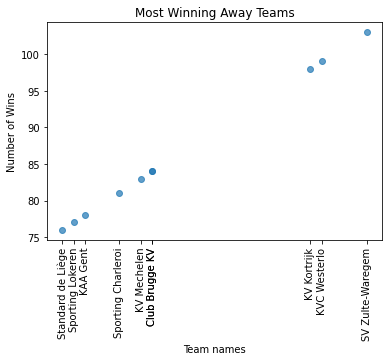

<Figure size 720x720 with 0 Axes>

In [79]:
# here is a scatter plot of some of the away teams
match = df_match.query('away_team_name == result').groupby(['result']).count()['id'].sort_values(ascending= False)[:10]
match_names = df_match.query('away_team_name == result').result.unique()[:10]
plt.scatter(match, match, alpha=0.7)
plt.xticks(ticks= match, labels= match_names, rotation= 90)
plt.xlabel('Team names')
plt.ylabel('Number of Wins')
plt.title('Most Winning Away Teams')
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show();

Barcelona and Real Madrid are the most away winning teams.

### Research Question 2  (Which team won the league in 2008/2009 season in England Premier league?)

> Query the required season and league which are 2008/2009 and England Premier league.

In [80]:
matches = df_match.query('season == "2008/2009" and country_name == "England"')[['league_name', 'home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name', 'result']]

In [81]:
matches.head()

,league_name,home_team_goal,away_team_goal,home_team_name,away_team_name,result
1728,England Premier League,1,1,Manchester United,Newcastle United,draw
1729,England Premier League,2,0,Manchester United,West Ham United,Manchester United
1730,England Premier League,4,3,Manchester United,Hull City,Manchester United
1731,England Premier League,5,0,Manchester United,Stoke City,Manchester United
1732,England Premier League,1,0,Manchester United,Sunderland,Manchester United


In [82]:
# count values for matches results descindingly to extract the most winning team
winner = matches['result'].value_counts()
winner.head()

draw                 97
Manchester United    28
Liverpool            25
Chelsea              25
Arsenal              20
Name: result, dtype: int64

> Manchester United is the most winning team in the league in 2008/2009 season as he won the league

### Research Question 3 (Which players had the highest interceptions?)

In [83]:
df_player.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187


In [84]:
# Getting the highest number of interceptions for the first 10 players sorted
df_player.groupby(['player_name'])['interceptions'].max().sort_values(ascending=False)[:10]

player_name
Andrea Pirlo         96.0
Timmy Simons         96.0
Paolo Maldini        95.0
Claude Makelele      94.0
Javier Mascherano    94.0
Paul Scholes         94.0
Filippo Inzaghi      93.0
Naldo                93.0
Xavi Hernandez       93.0
Philipp Lahm         93.0
Name: interceptions, dtype: float64

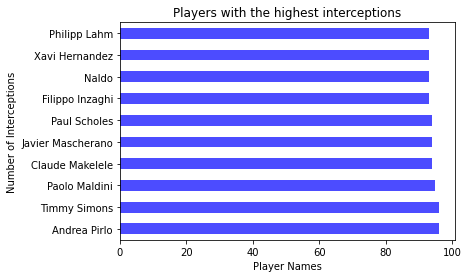

In [85]:
df_player.groupby(['player_name'])['interceptions'].max().sort_values(ascending=False)[:10].plot(kind='barh',alpha= 0.7, color=['blue'])
plt.title('Players with the highest interceptions')
plt.xlabel('Player Names')
plt.ylabel('Number of Interceptions');

Andrea Pirlo was the most player achieved interceptions.

### Research Question 4 (Which players had the highest ratings?)

In [86]:
# Getting the highest ratings for the first 10 players sorted
df_player.groupby(['player_name'])['overall_rating'].max().sort_values(ascending=False)[:10]

player_name
Lionel Messi         94.0
Cristiano Ronaldo    93.0
Gianluigi Buffon     93.0
Wayne Rooney         93.0
Xavi Hernandez       92.0
Gregory Coupet       92.0
Iker Casillas        91.0
John Terry           91.0
Thierry Henry        91.0
Andres Iniesta       91.0
Name: overall_rating, dtype: float64

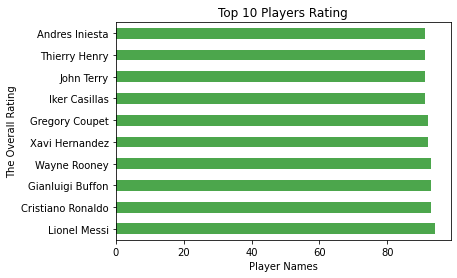

In [87]:
df_player.groupby(['player_name'])['overall_rating'].max().sort_values(ascending=False)[:10].plot(kind='barh',alpha= 0.7, color=['green'])
plt.title('Top 10 Players Rating')
plt.xlabel('Player Names')
plt.ylabel('The Overall Rating');

Lionel Messi has the highest overall rating.

### Research Question 5 (Which is the most preferred foot ?)

In [88]:
# Getting the count of each foot
right=1
left=1
# Creating a number of preferred_foot 
for i, preferred in enumerate(df_player['preferred_foot']):
    if preferred == 'right':
        right += 1
    else:
        left += 1
print(right)
print(left)

138410
45570


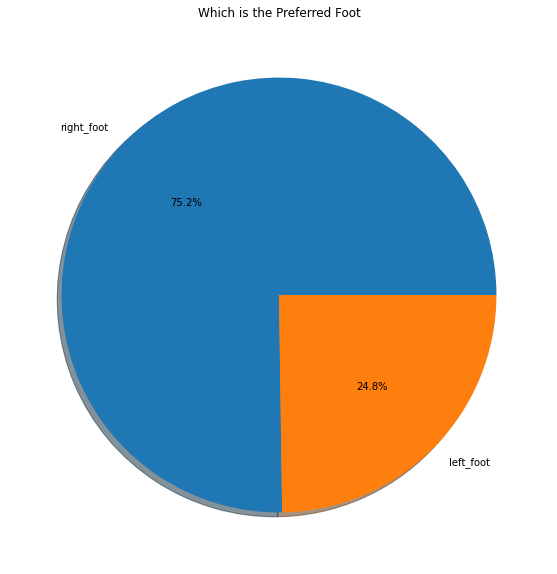

In [89]:
# Creating a pie chart for percentage of each foot
plt.figure(figsize=(10, 10))
pie_labels = ['right_foot','left_foot']
plt.pie([right, left], labels = pie_labels, autopct='%1.1f%%',shadow=True)
plt.title('Which is the Preferred Foot');

The right foot is the preferred one.

<a id='conclusions'></a>
## Conclusions

> #### 1. Which home/away teams had the most wins in all leagues from 2008 to 2016?
> Barcelona and Real Madrid are the most winning team in each home and away matches.
>
> #### 2. Which team won the league in 2008/2009 season in England Premier league?
> Manchester United won The English Premier League by 28 wins which is the highest, so they collected more points than any other premier league team in 2008/2009 season.
>
> #### 3. Which players had the highest interceptions?
> The top 10 players achieved interceptions from 2008 to 2016 are:
> 1. Andrea Pirlo
> 2. Timmy Simons
> 3. Paolo Maldini
> 4. Claude Makelele
> 5. Javier Mascherano
> 6. Paul Scholes
> 7. Filippo Inzaghi
> 8. Naldo
> 9. Xavi Hernandez
> 10. Philipp Lahm
>
> #### 4. Which players had the highest ratings?
> The top 10 players with overall rating are:
> 1. Lionel Messi         94.0
> 2. Cristiano Ronaldo    93.0
> 3. Gianluigi Buffon     93.0
> 4. Wayne Rooney         93.0
> 5. Xavi Hernandez       92.0
> 6. Gregory Coupet       92.0
> 7. Iker Casillas        91.0
> 8. John Terry           91.0
> 9. Thierry Henry        91.0
> 10. Andres Iniesta      91.0
>
> #### 5. Which is the most preferred foot ?
> The Preferred foot is the right foot as 75.2% of the total players are right-foot players.


## Limitations

> After I had viewed the whole dataset, I've found that there are alot of missing values and some columns specially in match table are incomprehensible, so I had to drom them and I couldn't get an output from them.
>
> During the analysis of project, I faced alot of challenges and that because the data wasn't quite accurate.
>
> Some team names were missing, so I analyzed on IDs and because of that the process wasn't clear.

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0